## To implement Naive Bayes Model

* Naive Bayes algorithm is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. 
* In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

#### 1. Import the necessary libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 2. The dataset is imported using the pandas library. It is imported in a dataframe from the data.csv file

The dataset that I have selected contains 24 features (or attributes) and 194 rows (or instances). It is composed of biomedical voice measurements from 31 people, out of which 23 have Parkinson's Disease.
* Each column is a particular voice measure
* Each row corresponds to the voice recordings of these individuals
* The aim here is to segregate healthy people from the people having Parkinson's Disease using the 'status' column which is set to '0' for healthy people and '1' for people with Parkinson

In [3]:
dataset = pd.read_csv('data.csv')
x=dataset.loc[:,dataset.columns!='status'].values[:,1:]
y=dataset.loc[:,'status'].values
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


#### 3. Preprocessing the data using LabelEncoder, OneHotEncoder and MinMax Scaler before training it

LabelEncoder and OneHotEncoder are parts of the SciKit Learn library in Python, and they are used to convert categorical data, or text data, into numbers, which our predictive models can better understand

In [4]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_x = LabelEncoder()
x[:,0] = labelencoder_x.fit_transform(x[:,0])

onehotencoder = ColumnTransformer([("name", OneHotEncoder(), [0])], remainder = 'passthrough')
x=onehotencoder.fit_transform(x).toarray()

MinMaxScaler is an estimator that scales and translates each feature individually such that it is in the given range on the training set, e.g. here it is scaled between -1 and 1.

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)

#### 4. Splitting our dataset into Training set and Test set using KFold

I have used KFold to split my dataset into Training and Test Set because simply splitting it got very low accuracy results of only about 30%

K-Folds cross-validator:
Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [49]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=9)  # here I have taken k(folds) equal to 9
kf.get_n_splits(x)
kf

KFold(n_splits=9, random_state=None, shuffle=False)

In [34]:
for train_index, test_index in kf.split(x):
      print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = x[train_index], x[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [ 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194] Validation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71 

- we can check how our training and testing data look after splitting

In [35]:
x

array([[-1.        , -1.        , -1.        , ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-1.        , -1.        , -1.        , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-1.        , -1.        , -1.        , ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [-1.        , -1.        , -1.        , ..., -0.31484696,
         0.11793486, -0.63884033],
       [-1.        , -1.        , -1.        , ..., -0.09423055,
        -0.36355605, -0.67372646],
       [-1.        , -1.        , -1.        , ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [36]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [37]:
x_train

array([[-1.        , -1.        , -1.        , ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-1.        , -1.        , -1.        , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-1.        , -1.        , -1.        , ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [-1.        , -1.        , -1.        , ..., -0.04276494,
        -0.31479517, -0.52017282],
       [-1.        , -1.        , -1.        , ..., -0.16212049,
        -0.58563848, -0.46310902],
       [-1.        , -1.        , -1.        , ..., -0.1631335 ,
        -0.61807811, -0.44022302]])

In [38]:
x_test

array([[-1.        , -1.        , -1.        , ...,  0.00411734,
        -0.59992402, -0.50881473],
       [-1.        , -1.        , -1.        , ..., -0.13707428,
        -0.50925054, -0.42203849],
       [-1.        , -1.        , -1.        , ..., -0.53634581,
        -0.48268137, -0.46196161],
       ...,
       [-1.        , -1.        , -1.        , ..., -0.31484696,
         0.11793486, -0.63884033],
       [-1.        , -1.        , -1.        , ..., -0.09423055,
        -0.36355605, -0.67372646],
       [-1.        , -1.        , -1.        , ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [39]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [40]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

#### 5. Implement the Gaussian Naive Bayes model : It implements the Gaussian Naive Bayes algorithm for classification.

* Create a GaussianNB classifier
* Train the model using the training sets

In [43]:
from sklearn.naive_bayes import GaussianNB
#Create a GaussianNB classifier
classifier = GaussianNB()
#Train the model using the training sets
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### 6. Predict the output using the .predict() method provided by sklearn

In [44]:
preds= classifier.predict(x_test)

#### 7. Import classification report, accuracy score and confusion matrix to view the results

In [52]:
#making the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,plot_confusion_matrix

* Print the <b>confusion matrix</b>

In [46]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[15  0]
 [ 6  0]]


* Plot the confusion matrix using matplot lib and plot_confusion_matrix

Confusion matrix, without normalization
[[15  0]
 [ 6  0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


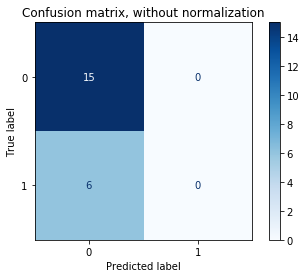

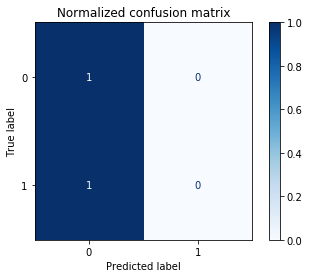

In [59]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

This means that using the Naive Bayes Model, only 15 predictions were correct whereas 6 predictions were incorrect

* Print the <b>classification report</b>

In [61]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       0.00      0.00      0.00         6

    accuracy                           0.71        21
   macro avg       0.36      0.50      0.42        21
weighted avg       0.51      0.71      0.60        21



C:\Users\deepika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


* Print the <b>accuracy</b>

In [62]:
print('accuracy:',accuracy_score(y_test.tolist(), preds.tolist())*100)

accuracy: 71.42857142857143


Thus it can be concluded from the following that the accuracy of the predicted data was very low, only about 30.5 % , when I was splitting the matrices into random test and train sets.
When I used KFold cross-validator to split my dataset , I got an improved result with an accuracy of 71.42% . This is because KFold splits the dataset into k consecutive folds (without shuffling by default).